In [1]:
from EMDA import EMDA, __version__
print("EMDA version is:", __version__)


from numpy import average

import matplotlib.pyplot as plt

plt.style.use('ggplot')

EMDA version is: 1.0.0a4


# Load parameters and trajectory <a class="anchor" id="load"></a>

In [2]:
parameters = 'parameters.prmtop' # AMBER parameters file
trajectory = 'trajectory.nc'     # AMBER NetCDF coordinates (10 frames)

In [3]:
emda = EMDA(parameters=parameters, trajectory=trajectory)

Trajectory has been loaded!


In [4]:
emda.load_trajectory(trajectory)
emda.load_variant(parameters, trajectory)
#emda.load_trajectory(trajectory, variant_name='V1')
emda.load_trajectory(trajectory)

emda.universe

A new replica has been loaded to variant V1!
V2 variant has been loaded!
A new replica has been loaded to variant V2!


{'V1': {'R1': <Universe with 79250 atoms>, 'R2': <Universe with 79250 atoms>},
 'V2': {'R1': <Universe with 79250 atoms>, 'R2': <Universe with 79250 atoms>}}

# Select the atoms to be used for the analysis <a class="anchor" id="select"></a>

In [5]:
emda.select('C10', 'C10', sel_type='at_name',)
emda.select('C11', 'C11', sel_type='at_name',)
emda.select('C12', 'C12', sel_type='at_name',)
emda.select('C13', 'C13', sel_type='at_name')
emda.select('C14', 'C14', sel_type='at_name',)
emda.select('H12', ['H12A', 'H12B'], sel_type='at_name')
emda.select('cof', 10597, sel_type='at_num')

emda.select('COO', [10599, 10600, 10601], sel_type='at_num')

#subs = emda.universe.select_atoms('resid 666')
emda.select('subs', 666, sel_type='res_num')

print(emda.selections)

{'C10': 'name C10', 'C11': 'name C11', 'C12': 'name C12', 'C13': 'name C13', 'C14': 'name C14', 'H12': 'name H12A or name H12B', 'cof': 'bynum 10597', 'COO': 'bynum 10599 or bynum 10600 or bynum 10601', 'subs': 'resid 666'}


# Analysis of the trajectory <a class="anchor" id="trajanalysis"></a>

In [6]:
emda.print_available_adders()

Method: add_RMSD
Help:
DESCRIPTION:
    This function outputs the RMSD of a selection

No usage available.


Method: add_angle
Help:
DESCRIPTION:
    This functions measures the angle between 3 specified atoms and returns the value between 0 and 360 degrees.
    The input selections have to be single atoms.

No usage available.


Method: add_contacts
Help:
DESCRIPTION:
    This function takes a Universe, a selection and a radius and returns the list of residues nearer than the specified radius.

No usage available.


Method: add_dihedral
Help:
DESCRIPTION:
    This functions measures the dihedral angle between 4 specified atoms and returns the dihedral value between 0 and 360 degrees.
    The input selections have to be single atoms.

No usage available.


Method: add_distWATbridge
Help:
DESCRIPTION
    This function takes a Universe, two selections and the size of their environments and returns the nearest bridging water between the two selections and the distance to both of them.

No

In [7]:
emda.add_distance('dist_H12', 'cof', 'H12')
emda.add_angle('angle_C11C12C13', 'C11', 'C12', 'C13')
#emda.add_dihedral('dihe_C10C11C13C14', 'C10', 'C11', 'C13', 'C14', domain=180)
#emda.add_contacts('contacts_COO', 'COO', sel_env=5, interactions='all', include_WAT=True, measure_distances=True)
#emda.add_protein_contacts('contacts_prot', sel_env=3, measure_distances=True)
#emda.add_pKa('pka', excluded_ions=['Na+'], keep_pdb=True, keep_pka=True)
#emda.add_RMSD('RMSD_subs', 'subs', weights='mass')

## Run the measurements

In [8]:
print(emda.measures)

{'dist_H12': Measure dataclass with:
	Name:   dist_H12
	Type:   distance
	Sel:    ['cof', 'H12']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
		V2, R1: Not calculated
		V2, R2: Not calculated
, 'angle_C11C12C13': Measure dataclass with:
	Name:   angle_C11C12C13
	Type:   angle
	Sel:    ['C11', 'C12', 'C13']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
		V2, R1: Not calculated
		V2, R2: Not calculated
}


In [9]:
emda.run(sleep_time=0)

Variants:   0%|          | 0/2 [00:00<?, ?var/s]

Measuring variant V1, replica R1:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V1, replica R2:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R1:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R2:   0%|          | 0/10 [00:00<?, ?Frame/s]

emda.measures['dist_H12'].result

merge False


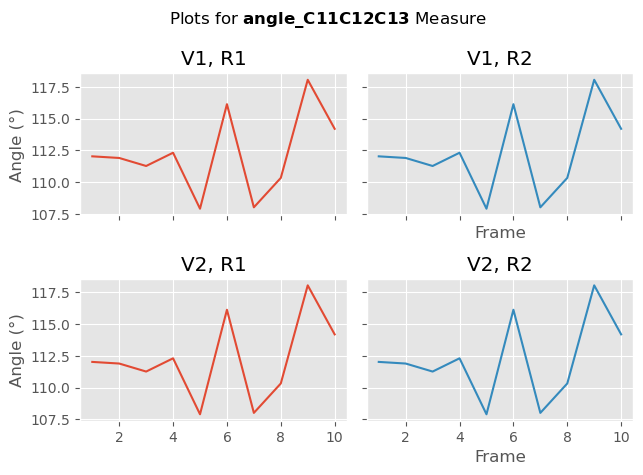

In [10]:
emda.plot_measure(measure_name='angle_C11C12C13',)

merge False


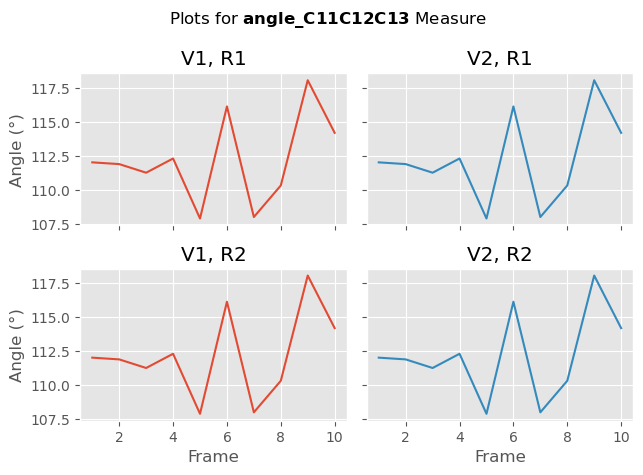

In [11]:
emda.measures['angle_C11C12C13'].plot(merge_replica_plots=False)

In [12]:
emda.analyses['RMSD_subs']

KeyError: 'RMSD_subs'

## Analyse distances, angles and dihedrals

In [27]:
emda.analyse_value('dist_H12_bool', 'dist_H12', 5)
emda.analyse_value('dihe_C10C11C13C14_bool', 'dihe_C10C11C13C14', 0, 20, mode='tol')

In [28]:
emda.analyses['dist_H12_bool']

Analysis dataclass with:
	Name:   dist_H12_bool
	Type:   value
	Related mesure:    dist_H12

In [29]:
emda.analyses['dihe_C10C11C13C14_bool']

Analysis dataclass with:
	Name:   dihe_C10C11C13C14_bool
	Type:   value
	Related mesure:    dihe_C10C11C13C14

print('angle_C11C12C13 average is:', average(emda.measures['angle_C11C12C13'].result))
print('angle_C11C12C13 min is:', min(emda.measures['angle_C11C12C13'].result))
print('angle_C11C12C13 max is:', max(emda.measures['angle_C11C12C13'].result))

emda.analyse_value('angle_C11C12C13_bool', 'angle_C11C12C13', 110, 5, mode='tol')

emda.analyses

In [30]:
emda.analyse_NACs('dist_dihe_NACs', ['dist_H12_bool', 'dihe_C10C11C13C14_bool'], invert=False)


In [31]:
emda.analyses['dist_dihe_NACs'].result

{'V1': {'R1': [True, True, True, True, True, True, False, False, False, False],
  'R2': [True, True, True, True, True, True, False, False, False, False]},
 'V2': {'R1': [True, True, True, True, True, True, False, False, False, False],
  'R2': [True, True, True, True, True, True, False, False, False, False]}}

print('dist_H12_bool:\t\t\t', emda.analyses['dist_H12_bool'].result)
print('angle_C11C12C13_bool:\t\t', emda.analyses['angle_C11C12C13_bool'].result)
print('dist_angle_NACs:\t\t', emda.analyses['dist_angle_NACs'].result)

## Analyse contacts

emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO')

emda.analyses['contacts_COO_freq'].result['V1']['R2']

In [21]:
#emda.analyse_contacts_frequency('contacts_prot_freq', 'contacts_prot', percentage=True, normalise_to_most_frequent=True)
emda.analyse_contacts_amount('contacts_prot_amount', 'contacts_prot')

emda.analyses['contacts_prot_amount'].result['V1']['R1']

[{'MET1': 5,
  'GLY2': 3,
  'ARG3': 5,
  'TYR4': 8,
  'ARG5': 5,
  'ILE6': 10,
  'ARG7': 7,
  'VAL8': 8,
  'ALA9': 4,
  'THR10': 9,
  'GLY11': 4,
  'ALA12': 3,
  'TRP13': 5,
  'LEU14': 4,
  'PHE15': 2,
  'SER16': 4,
  'GLY17': 5,
  'SER18': 6,
  'TYR19': 3,
  'ASN20': 6,
  'ARG21': 8,
  'VAL22': 8,
  'GLN23': 6,
  'LEU24': 10,
  'TRP25': 10,
  'LEU26': 9,
  'VAL27': 10,
  'GLY28': 7,
  'THR29': 5,
  'ARG30': 3,
  'GLY31': 5,
  'GLU32': 5,
  'ALA33': 6,
  'GLU34': 4,
  'LEU35': 7,
  'GLU36': 3,
  'LEU37': 7,
  'GLN38': 4,
  'LEU39': 9,
  'ARG40': 6,
  'PRO41': 7,
  'ALA42': 4,
  'ARG43': 8,
  'GLY44': 4,
  'GLU45': 4,
  'GLU46': 6,
  'GLU47': 6,
  'GLU48': 3,
  'PHE49': 7,
  'ASP50': 4,
  'HID51': 6,
  'ASP52': 2,
  'VAL53': 9,
  'ALA54': 2,
  'GLU55': 6,
  'ASP56': 3,
  'LEU57': 10,
  'GLY58': 4,
  'LEU59': 4,
  'LEU60': 11,
  'GLN61': 9,
  'PHE62': 10,
  'VAL63': 8,
  'ARG64': 8,
  'LEU65': 11,
  'ARG66': 8,
  'LYS67': 11,
  'HIE68': 5,
  'HID69': 6,
  'TRP70': 4,
  'LEU71': 2,
  'VAL

In [22]:
#emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO', percentage=True, normalise_to_most_frequent=True)
emda.analyse_contacts_amount('contacts_COO_amount', 'contacts_COO')

emda.analyses['contacts_COO_amount'].result['V1']['R1']

[19, 17, 19, 15, 15, 17, 19, 14, 15, 16]